In [157]:
import pandas as pd
import quandl
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot
jtplot.reset()
import math
quandl.ApiConfig.api_key = 'SVCwUsxMpuF3eQ-URgUT'

In [158]:
start = datetime.datetime(2010, 1, 1)

# end = datetime.datetime(2013, 1, 27)

df = web.DataReader("GOOG", 'yahoo', start)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,310.356445,310.679321,307.986847,307.986847,307.986847,2455400
2010-01-04,311.449310,312.721039,310.103088,311.349976,311.349976,3937800
2010-01-05,311.563568,311.891449,308.761810,309.978882,309.978882,6048500
2010-01-06,310.907837,310.907837,301.220856,302.164703,302.164703,8009000
2010-01-07,302.731018,303.029083,294.410156,295.130463,295.130463,12912000


In [159]:
df.to_csv('googledata.csv')
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-11,1035.500000,1043.800049,1032.050049,1041.099976,1041.099976,1192800
2017-12-12,1039.630005,1050.310059,1033.689941,1040.479980,1040.479980,1279500
2017-12-13,1046.119995,1046.665039,1038.380005,1040.609985,1040.609985,1282700
2017-12-14,1045.000000,1058.500000,1043.109985,1049.150024,1049.150024,1558700
2017-12-15,1054.609985,1067.619995,1050.189941,1064.189941,1064.189941,2674379


In [160]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Low'] * 100.0
df['Return'] = df['Adj Close'].pct_change()

In [161]:
df.fillna(-99999,inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,HL_PCT,Return
Date,,,,,,,,
2009-12-31,310.356445,310.679321,307.986847,307.986847,307.986847,2455400,0.874217,-99999.000000
2010-01-04,311.449310,312.721039,310.103088,311.349976,311.349976,3937800,0.844220,0.010920
2010-01-05,311.563568,311.891449,308.761810,309.978882,309.978882,6048500,1.013609,-0.004404
2010-01-06,310.907837,310.907837,301.220856,302.164703,302.164703,8009000,3.215906,-0.025209
2010-01-07,302.731018,303.029083,294.410156,295.130463,295.130463,12912000,2.927524,-0.023279


In [162]:

forecast_out = 30
df['Label'] = df['Adj Close'].shift(-forecast_out)
df.dropna(inplace=True)

In [163]:
# df[:][-20:]

In [164]:
X = np.array(df[['Adj Close','HL_PCT','Return']])
y = np.array(df['Label'])
X = preprocessing.scale(X)
len(X), len(y)

(1975, 1975)

In [165]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [166]:
lr = svm.SVR(kernel='rbf')
lr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where u is the residual
sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
sum of squares ((y_true - y_true.mean()) ** 2).sum().
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always
predicts the expected value of y, disregarding the input features,
would get a R^2 score of 0.0.

In [167]:
accuracy = lr.score(X_test,y_test)
accuracy

0.83624981500605422

In [168]:
y_pred = lr.predict(X_test)

In [169]:
df.dropna(inplace=True)
X = np.array(df[['Adj Close','HL_PCT','Return']])
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]
y = np.array(df['Label'])
y = y[:-forecast_out]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [170]:
len(X), len(y)

(1945, 1945)

In [171]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train,y_train)
accuracy = lr.score(X_test,y_test)
accuracy

0.97002327779639874

In [172]:
forecast_set = lr.predict(X_lately)
forecast_set, accuracy, forecast_out

(array([  943.96491391,   936.39868604,   940.26680859,   960.23135343,
          965.18798814,   974.88924501,   969.04038278,   973.55964572,
          967.3877958 ,   985.92735179,   994.96046227,   992.988834  ,
          988.59352665,  1005.45681017,  1003.93903992,  1005.80191315,
         1008.16301741,  1008.32717746,  1008.98054882,  1000.53306276,
         1004.2902253 ,   984.46534735,   986.47369606,   989.33331305,
          988.55147243,  1035.99195567,  1033.61827416,  1033.11022963,
         1042.06266937,  1042.16350156]), 0.97002327779639874, 30)

<IPython.core.display.Javascript object>


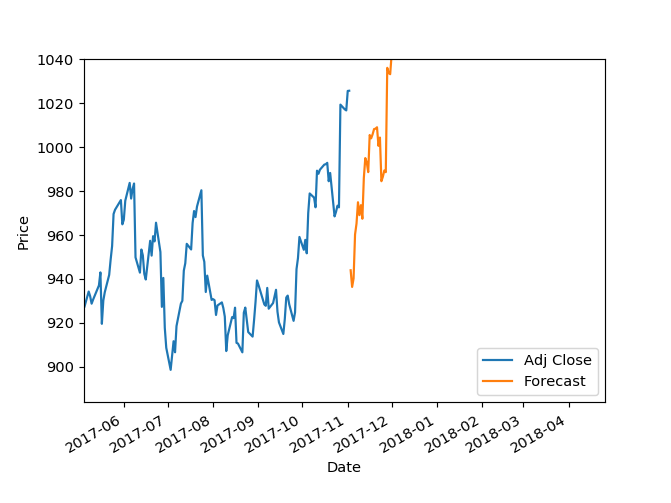

In [173]:
import math, datetime
%matplotlib notebook
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day= 86400
next_unix= last_unix+one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix+=one_day
    df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()